#Load Dataset For Yolo

In [ ]:
!curl -L "https://public.roboflow.com/ds/N3Gi1NiYFv?key=DGssI4Gmhc" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   895  100   895    0     0    449      0  0:00:01  0:00:01 --:--:--   449
100 46.0M  100 46.0M    0     0  7379k      0  0:00:06  0:00:06 --:--:-- 14.3M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/_darknet.labels    
 extracting: test/img-105_jpg.rf.3fe9dff3d1631e79ecb480ff403bcb86.jpg  
 extracting: test/img-105_jpg.rf.3fe9dff3d1631e79ecb480ff403bcb86.txt  
 extracting: test/img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg  
 extracting: test/img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.txt  
 extracting: test/img-146_jpg.rf.61be25b3053a51f622a244980545df2b.jpg  
 extracting: test/img-146_jpg.rf.61be25b3053a51f622a244980545df2b.txt  
 extracting: test/img-161_jpg.rf.211541e7178a4a93ec0680f26b905427.jpg  
 extracting: test/img-16

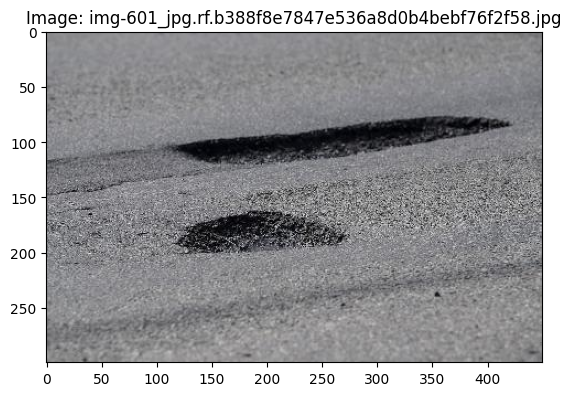

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the image file
image_path = "valid/img-601_jpg.rf.b388f8e7847e536a8d0b4bebf76f2f58.jpg"

# Load and display the image
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.title("Image: img-601_jpg.rf.b388f8e7847e536a8d0b4bebf76f2f58.jpg")
plt.show()

# Display the shape of the image
print("Image Shape:", img.shape)


In [ ]:
import os
import shutil

def create_image_and_label_folders(source_folder, dest_folder):
    # Create 'image' and 'label' folders in the destination directory
    image_folder = os.path.join(dest_folder, 'images')
    label_folder = os.path.join(dest_folder, 'labels')

    os.makedirs(image_folder, exist_ok=True)
    os.makedirs(label_folder, exist_ok=True)

    # Iterate over files in the source folder
    for filename in os.listdir(source_folder):

        name, extension = os.path.splitext(filename)

        if (extension==".jpg"):
            image_path = os.path.join(source_folder, filename)
            img = mpimg.imread(image_path)
            # Check if the shape is (720, 720)
            if img.shape == (720, 720, 3):
            # Copy jpg files to the 'image' folder
              shutil.copy2(os.path.join(source_folder, filename), os.path.join(image_folder, filename))
                  # Create a corresponding txt file in the 'label' folder
              filename = name+'.txt'
              shutil.copy2(os.path.join(source_folder, filename), os.path.join(label_folder, filename))

# Replace these paths with your actual paths
train_source_folder = '/content/train'
train_dest_folder = '/content/datasets/pothole_dataset_v8/train'

valid_source_folder = '/content/valid'
valid_dest_folder = '/content/datasets/pothole_dataset_v8/valid'

test_source_folder = '/content/test'
test_dest_folder = '/content/datasets/pothole_dataset_v8/test'

# Create 'image' and 'label' folders for train, valid, and test sets
create_image_and_label_folders(train_source_folder, train_dest_folder)
create_image_and_label_folders(valid_source_folder, valid_dest_folder)
create_image_and_label_folders(test_source_folder, test_dest_folder)


Image Shape: (300, 450, 3)


In [ ]:
%%writefile /content/datasets/pothole_dataset_v8/pothole.yaml
path: pothole_dataset_v8/
train: 'train/images'
val: 'valid/images'

# class names
names:
  0: 'pothole'

Writing /content/datasets/pothole_dataset_v8/pothole.yaml


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.7/645.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

100%|██████████| 6.23M/6.23M [00:00<00:00, 220MB/s]


In [ ]:
results = model.train(data='/content/datasets/pothole_dataset_v8/pothole.yaml', imgsz=720, epochs=300, batch=16, name='yolov8n_custom')

Ultralytics YOLOv8.0.217 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/pothole_dataset_v8/pothole.yaml, epochs=300, patience=50, batch=16, imgsz=720, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_custom, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, form

100%|██████████| 755k/755k [00:00<00:00, 133MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/datasets/pothole_dataset_v8/train/labels... 198 images, 0 backgrounds, 0 corrupt: 100%|██████████| 198/198 [00:00<00:00, 2123.39it/s]

train: New cache created: /content/datasets/pothole_dataset_v8/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/pothole_dataset_v8/valid/labels... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 999.43it/s]

val: New cache created: /content/datasets/pothole_dataset_v8/valid/labels.cache


Plotting labels to runs/detect/yolov8n_custom/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 736 train, 736 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8n_custom
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300       3.1G      1.846      3.685      1.814         27        736: 100%|██████████| 13/13 [00:09<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

                   all         60        116     0.0045      0.698      0.187     0.0917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      2.86G      1.572       2.83      1.565         26        736: 100%|██████████| 13/13 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         60        116    0.00444       0.69      0.268      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      2.93G       1.45      2.255      1.469         22        736: 100%|██████████| 13/13 [00:06<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         60        116      0.902     0.0794      0.262      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      2.91G      1.468      2.085      1.474         18        736: 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         60        116      0.948       0.19      0.334      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300       2.9G      1.494      2.147      1.459         15        736: 100%|██████████| 13/13 [00:05<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all         60        116      0.465      0.379      0.357      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      2.87G      1.467      2.068      1.459         20        736: 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         60        116      0.418      0.328      0.334       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300       2.9G      1.516       2.02      1.469         31        736: 100%|██████████| 13/13 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all         60        116       0.23      0.276      0.231     0.0906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      2.87G      1.518      2.096      1.526         17        736: 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         60        116      0.371      0.405       0.32      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      2.89G       1.46      1.816      1.471         28        736: 100%|██████████| 13/13 [00:05<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all         60        116      0.175      0.397      0.183     0.0629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      2.92G      1.489      1.877      1.479         25        736: 100%|██████████| 13/13 [00:04<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         60        116      0.455      0.388      0.348      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      2.93G      1.432       1.79      1.444         14        736: 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         60        116      0.186      0.284      0.149     0.0727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300       2.9G      1.578      1.932      1.533         15        736: 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         60        116      0.529      0.446      0.397      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      2.86G      1.505      1.794      1.528         13        736: 100%|██████████| 13/13 [00:03<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         60        116      0.619      0.509        0.5      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      2.87G      1.395      1.612      1.391         17        736: 100%|██████████| 13/13 [00:04<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all         60        116      0.629       0.31      0.334      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      2.89G      1.371      1.592      1.399         21        736: 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         60        116      0.652      0.259      0.338      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      2.92G      1.468      1.585       1.45         18        736: 100%|██████████| 13/13 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         60        116      0.654      0.405      0.436      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      2.91G      1.399      1.504      1.393         21        736: 100%|██████████| 13/13 [00:04<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         60        116      0.312      0.285      0.255      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      2.93G       1.42      1.552      1.397         15        736: 100%|██████████| 13/13 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         60        116      0.529      0.293      0.333      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300       2.9G      1.347      1.444      1.406         14        736: 100%|██████████| 13/13 [00:05<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         60        116       0.61      0.448      0.502       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      2.87G      1.408       1.47      1.423         14        736: 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         60        116      0.634      0.553      0.583      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      2.89G      1.435      1.476      1.419         22        736: 100%|██████████| 13/13 [00:05<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all         60        116      0.613      0.588       0.56      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      2.89G      1.306      1.346      1.341         16        736: 100%|██████████| 13/13 [00:03<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         60        116      0.729      0.581      0.634      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      2.89G      1.328      1.293      1.335         31        736: 100%|██████████| 13/13 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all         60        116       0.68      0.526       0.57      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300       2.9G      1.425      1.437      1.407         12        736: 100%|██████████| 13/13 [00:04<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         60        116      0.698      0.431      0.526      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      2.89G      1.342      1.395      1.361          9        736: 100%|██████████| 13/13 [00:03<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         60        116      0.663      0.534      0.588      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      2.92G      1.313      1.282      1.344         24        736: 100%|██████████| 13/13 [00:05<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         60        116      0.771      0.448      0.583      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      2.92G      1.353      1.312      1.381         21        736: 100%|██████████| 13/13 [00:03<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         60        116      0.685      0.578      0.623      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      2.92G      1.318      1.242      1.321         23        736: 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all         60        116      0.714      0.624      0.678      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300       2.9G      1.266       1.16        1.3         23        736: 100%|██████████| 13/13 [00:03<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         60        116      0.829      0.526      0.627      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      2.87G      1.239      1.127      1.305         15        736: 100%|██████████| 13/13 [00:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         60        116      0.783       0.59      0.656      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      2.87G       1.26      1.112      1.306         21        736: 100%|██████████| 13/13 [00:04<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         60        116      0.834        0.5      0.644      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      2.87G      1.292      1.159      1.291         13        736: 100%|██████████| 13/13 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         60        116      0.674      0.595      0.609      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      2.88G      1.346       1.23      1.351         27        736: 100%|██████████| 13/13 [00:05<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         60        116      0.728      0.578      0.639      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      2.87G      1.253      1.127      1.315         25        736: 100%|██████████| 13/13 [00:03<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         60        116      0.789      0.586      0.622      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      2.87G      1.247      1.147      1.298         23        736: 100%|██████████| 13/13 [00:04<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all         60        116      0.818      0.502      0.621      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      2.89G      1.268      1.138      1.298         19        736: 100%|██████████| 13/13 [00:04<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         60        116      0.732       0.59      0.645       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      2.91G      1.275      1.149      1.313         14        736: 100%|██████████| 13/13 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         60        116      0.731      0.516      0.588      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      2.92G      1.264      1.129      1.332         21        736: 100%|██████████| 13/13 [00:05<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         60        116      0.714      0.448      0.563      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      2.87G      1.241      1.166        1.3         12        736: 100%|██████████| 13/13 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         60        116      0.751       0.44      0.554      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      2.92G      1.293       1.14       1.34         27        736: 100%|██████████| 13/13 [00:05<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         60        116      0.716      0.569      0.628      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      2.91G      1.203      1.112      1.274         24        736: 100%|██████████| 13/13 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         60        116      0.764      0.474      0.599      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      2.89G      1.285      1.162      1.324         16        736: 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         60        116      0.488      0.566      0.543      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      2.89G      1.199      1.038      1.269         10        736: 100%|██████████| 13/13 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         60        116      0.638      0.471      0.524      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      2.92G      1.189      1.086      1.254         17        736: 100%|██████████| 13/13 [00:03<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         60        116      0.626      0.476      0.569      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      2.86G      1.197      1.034      1.263         22        736: 100%|██████████| 13/13 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         60        116       0.78      0.534      0.651      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300       2.9G      1.218      1.031      1.276         18        736: 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         60        116      0.645      0.517      0.539      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      2.92G      1.186     0.9972      1.249         30        736: 100%|██████████| 13/13 [00:05<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         60        116      0.589        0.5       0.49      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      2.89G       1.24      1.066      1.279         19        736: 100%|██████████| 13/13 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         60        116      0.775      0.593      0.662      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      2.89G        1.2      1.043      1.253         15        736: 100%|██████████| 13/13 [00:04<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all         60        116      0.794      0.586      0.664      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      2.92G      1.234       1.13      1.323         14        736: 100%|██████████| 13/13 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         60        116      0.771       0.61      0.686      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      2.93G       1.18      1.034       1.26         19        736: 100%|██████████| 13/13 [00:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         60        116      0.817      0.569       0.68       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      2.92G      1.168       1.05      1.252         21        736: 100%|██████████| 13/13 [00:04<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         60        116      0.776      0.603      0.699      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      2.86G      1.229      1.025       1.29         17        736: 100%|██████████| 13/13 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         60        116      0.749      0.612      0.691      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      2.92G      1.126     0.9265      1.245         20        736: 100%|██████████| 13/13 [00:05<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         60        116      0.781      0.584      0.678      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      2.92G      1.092     0.8937      1.203         17        736: 100%|██████████| 13/13 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         60        116       0.75      0.596      0.654      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300       2.9G      1.121     0.9849      1.232         25        736: 100%|██████████| 13/13 [00:04<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all         60        116      0.769      0.569      0.663      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300       2.9G      1.146     0.9918      1.233         16        736: 100%|██████████| 13/13 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         60        116      0.708      0.621      0.695      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      2.92G      1.157     0.9598      1.243         10        736: 100%|██████████| 13/13 [00:04<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         60        116      0.796      0.538      0.657      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      2.93G      1.124     0.9099      1.234         17        736: 100%|██████████| 13/13 [00:04<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         60        116      0.778      0.638      0.707      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      2.92G      1.163     0.9701      1.214         16        736: 100%|██████████| 13/13 [00:03<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         60        116      0.767      0.603      0.688      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      2.92G      1.125     0.9023       1.21         15        736: 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         60        116      0.811      0.621      0.715      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      2.87G      1.054     0.8551      1.175         16        736: 100%|██████████| 13/13 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         60        116      0.819      0.629      0.715      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      2.94G      1.154     0.9578      1.252          9        736: 100%|██████████| 13/13 [00:05<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all         60        116      0.782      0.587      0.692      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      2.93G      1.071     0.8542       1.17         23        736: 100%|██████████| 13/13 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         60        116      0.705      0.603       0.64      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      2.91G        1.1     0.8797      1.177         20        736: 100%|██████████| 13/13 [00:04<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         60        116      0.682      0.569      0.587      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      2.89G      1.081     0.9094      1.193         15        736: 100%|██████████| 13/13 [00:04<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         60        116      0.747      0.661      0.718      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300       2.9G      1.109     0.9261      1.201         20        736: 100%|██████████| 13/13 [00:03<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         60        116      0.744      0.586      0.604       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300       2.9G       1.14     0.9413      1.207         11        736: 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         60        116      0.512      0.553      0.478      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      2.91G      1.103     0.9173      1.198         17        736: 100%|██████████| 13/13 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         60        116       0.62      0.612      0.618        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      2.87G      1.114     0.9044      1.215         15        736: 100%|██████████| 13/13 [00:04<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all         60        116      0.703      0.578        0.6      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      2.92G      1.117     0.8456      1.204         20        736: 100%|██████████| 13/13 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         60        116      0.609      0.576      0.566      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300       2.9G      1.139     0.8926      1.227         15        736: 100%|██████████| 13/13 [00:03<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all         60        116      0.758      0.603       0.65       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      2.89G      1.037     0.8248      1.164         29        736: 100%|██████████| 13/13 [00:04<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         60        116      0.695      0.647      0.683      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      2.89G      1.051     0.7938       1.16         19        736: 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         60        116      0.818      0.569      0.672      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      2.87G      1.079     0.8232      1.173         19        736: 100%|██████████| 13/13 [00:05<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]

                   all         60        116      0.771      0.621      0.665      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      2.93G      1.074     0.8309      1.187         28        736: 100%|██████████| 13/13 [00:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         60        116      0.799      0.652       0.74       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      2.92G      1.028      0.792      1.178         20        736: 100%|██████████| 13/13 [00:05<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         60        116      0.692      0.655      0.703      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      2.89G      1.024     0.8198      1.176         12        736: 100%|██████████| 13/13 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         60        116      0.771      0.609      0.681      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      2.92G      1.031     0.7998      1.159         19        736: 100%|██████████| 13/13 [00:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         60        116      0.869      0.573       0.72      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      2.92G      1.035     0.8075      1.139         20        736: 100%|██████████| 13/13 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         60        116      0.795      0.647       0.72      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      2.92G      1.056      0.817      1.199         14        736: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         60        116      0.842      0.578      0.674       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      2.88G      1.016     0.8019      1.163         10        736: 100%|██████████| 13/13 [00:05<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         60        116      0.754      0.621      0.686      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      2.92G      1.034     0.7778      1.163         21        736: 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         60        116      0.807      0.578      0.682      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      2.92G      1.036     0.7799      1.152         17        736: 100%|██████████| 13/13 [00:05<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all         60        116      0.756      0.586      0.669      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      2.86G      1.041     0.8246      1.174         16        736: 100%|██████████| 13/13 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         60        116      0.787      0.595      0.697      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300       2.9G      1.025     0.7919       1.16         10        736: 100%|██████████| 13/13 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         60        116      0.763      0.638      0.706       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300       2.9G     0.9935     0.7682      1.127         28        736: 100%|██████████| 13/13 [00:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         60        116       0.77      0.647      0.709      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300       2.9G      1.024      0.794      1.177         22        736: 100%|██████████| 13/13 [00:04<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         60        116      0.726      0.612      0.673      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      2.86G     0.9934     0.8065       1.15         18        736: 100%|██████████| 13/13 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.00it/s]

                   all         60        116      0.762      0.608      0.661      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300       2.9G     0.9695     0.7232      1.132         28        736: 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         60        116      0.733      0.578      0.649      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      2.92G      1.007      0.749      1.145         38        736: 100%|██████████| 13/13 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         60        116      0.732      0.638      0.671      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      2.92G      1.002     0.7948      1.143         13        736: 100%|██████████| 13/13 [00:04<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         60        116       0.75      0.603       0.68      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      2.89G     0.9746     0.7272      1.126         19        736: 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         60        116      0.883      0.586      0.689      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      2.93G      1.015     0.7611      1.148         18        736: 100%|██████████| 13/13 [00:04<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         60        116      0.777      0.603      0.652      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300       2.9G      0.961      0.745      1.112         11        736: 100%|██████████| 13/13 [00:03<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         60        116      0.789      0.621      0.724      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      2.88G     0.9855     0.7636      1.131         11        736: 100%|██████████| 13/13 [00:05<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         60        116      0.836      0.681      0.766      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      2.86G     0.9966     0.7407      1.159         21        736: 100%|██████████| 13/13 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         60        116      0.648      0.715      0.733      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      2.89G     0.9997     0.7675       1.15         23        736: 100%|██████████| 13/13 [00:05<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         60        116      0.717      0.681      0.722      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      2.89G      1.008     0.7543      1.152         31        736: 100%|██████████| 13/13 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         60        116       0.76      0.655      0.729      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      2.89G      1.027     0.7824      1.158         18        736: 100%|██████████| 13/13 [00:04<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all         60        116      0.798      0.681      0.731      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300       2.9G     0.9416       0.69      1.116         16        736: 100%|██████████| 13/13 [00:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         60        116      0.751      0.612      0.685      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      2.87G     0.9526     0.7018      1.128         17        736: 100%|██████████| 13/13 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         60        116       0.82       0.63      0.733      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      2.92G     0.9286     0.6685      1.095         23        736: 100%|██████████| 13/13 [00:04<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         60        116      0.779       0.67      0.708      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      2.89G     0.9518     0.7163      1.104         18        736: 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         60        116      0.848      0.638      0.735      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300       2.9G     0.9705     0.7567      1.134         16        736: 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         60        116      0.761      0.631      0.731      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      2.92G     0.9406     0.7074      1.113         14        736: 100%|██████████| 13/13 [00:03<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         60        116      0.704      0.655      0.678      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      2.92G     0.9522     0.6899      1.101         31        736: 100%|██████████| 13/13 [00:04<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all         60        116      0.775      0.655      0.707      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300       2.9G     0.9861     0.7241       1.14         21        736: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         60        116      0.755      0.698      0.754      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      2.89G     0.9619     0.7278      1.121         22        736: 100%|██████████| 13/13 [00:04<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         60        116      0.841      0.672      0.761      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      2.87G     0.9027      0.695      1.083         19        736: 100%|██████████| 13/13 [00:04<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         60        116      0.851      0.664      0.762      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300       2.9G     0.9518     0.7101       1.13         18        736: 100%|██████████| 13/13 [00:04<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         60        116       0.87      0.638      0.747      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      2.92G     0.9769     0.6878      1.117         25        736: 100%|██████████| 13/13 [00:05<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         60        116      0.755      0.639      0.722       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      2.86G     0.9623     0.7512      1.154         12        736: 100%|██████████| 13/13 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         60        116       0.67      0.638      0.656      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      2.89G     0.9659     0.7092      1.125         17        736: 100%|██████████| 13/13 [00:05<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all         60        116      0.684      0.636      0.685      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      2.87G     0.9585     0.7022      1.107         18        736: 100%|██████████| 13/13 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         60        116      0.727      0.638      0.709      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      2.92G     0.9984     0.7313      1.146         23        736: 100%|██████████| 13/13 [00:04<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all         60        116      0.737      0.724      0.725       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      2.86G     0.9414     0.7404      1.117         25        736: 100%|██████████| 13/13 [00:04<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         60        116      0.792      0.638      0.722      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300       2.9G       0.94     0.6734      1.115         24        736: 100%|██████████| 13/13 [00:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         60        116      0.746      0.647      0.692      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      2.92G     0.9334     0.6756       1.13         20        736: 100%|██████████| 13/13 [00:05<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         60        116      0.782      0.612      0.683      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300       2.9G     0.9244     0.6847      1.108         10        736: 100%|██████████| 13/13 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         60        116       0.84      0.632      0.742      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      2.86G     0.9467     0.7165      1.117         35        736: 100%|██████████| 13/13 [00:05<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         60        116      0.942      0.586      0.743      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      2.92G     0.9116     0.6878       1.07         26        736: 100%|██████████| 13/13 [00:04<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         60        116      0.664      0.716      0.719      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      2.89G     0.9192     0.6709      1.092         24        736: 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         60        116      0.865      0.612      0.727      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      2.93G     0.9234     0.7001      1.105         24        736: 100%|██████████| 13/13 [00:04<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         60        116      0.775      0.569      0.651      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300       2.9G     0.9077     0.7027      1.087         16        736: 100%|██████████| 13/13 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         60        116      0.791      0.653      0.723      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      2.89G     0.8873     0.6586      1.101         18        736: 100%|██████████| 13/13 [00:05<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         60        116      0.853      0.612      0.733      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      2.87G      0.921     0.6971      1.113         19        736: 100%|██████████| 13/13 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         60        116      0.716      0.672      0.732      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      2.92G     0.9533     0.6839      1.112         13        736: 100%|██████████| 13/13 [00:05<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all         60        116      0.832      0.621      0.713      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      2.86G     0.9267     0.6728      1.116         17        736: 100%|██████████| 13/13 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         60        116      0.686      0.641      0.642       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      2.88G     0.8944      0.645       1.07         12        736: 100%|██████████| 13/13 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all         60        116      0.668      0.623      0.673      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      2.89G     0.9049     0.6615      1.103         19        736: 100%|██████████| 13/13 [00:04<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         60        116      0.806      0.578      0.713      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300       2.9G     0.9019     0.6954      1.112         19        736: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         60        116      0.748      0.666      0.742      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      2.86G     0.8875     0.6814      1.102         12        736: 100%|██████████| 13/13 [00:05<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         60        116      0.733      0.664      0.733      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300       2.9G     0.8987     0.6728      1.094         15        736: 100%|██████████| 13/13 [00:03<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         60        116      0.769      0.664      0.736      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300       2.9G     0.8574      0.642      1.082         23        736: 100%|██████████| 13/13 [00:05<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         60        116       0.75      0.672      0.724      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      2.87G     0.8939     0.6795      1.085         15        736: 100%|██████████| 13/13 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         60        116      0.791      0.672      0.757      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      2.91G     0.9044     0.6661      1.104         13        736: 100%|██████████| 13/13 [00:04<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all         60        116      0.822      0.675      0.755      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      2.92G     0.8608     0.6569      1.082         13        736: 100%|██████████| 13/13 [00:04<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         60        116      0.802      0.681      0.729      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      2.92G     0.8475     0.6178      1.056         17        736: 100%|██████████| 13/13 [00:03<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         60        116       0.78      0.674      0.711      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300       2.9G     0.8607     0.6122       1.07         19        736: 100%|██████████| 13/13 [00:05<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         60        116      0.858      0.612      0.741      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      2.86G     0.8769     0.6418      1.081         16        736: 100%|██████████| 13/13 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         60        116      0.844      0.651      0.717      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      2.92G     0.8753     0.6269      1.083         17        736: 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         60        116      0.796      0.637      0.712      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300       2.9G     0.8613     0.6236      1.056         19        736: 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         60        116       0.83      0.647      0.732      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300       2.9G     0.8253     0.6008      1.043         19        736: 100%|██████████| 13/13 [00:04<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all         60        116      0.826      0.654      0.734      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300       2.9G      0.851     0.5988       1.06         13        736: 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         60        116      0.745       0.68       0.73      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      2.87G     0.8428     0.6297      1.067         21        736: 100%|██████████| 13/13 [00:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         60        116      0.846      0.566      0.708      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      2.87G     0.8888     0.6514      1.086         19        736: 100%|██████████| 13/13 [00:05<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         60        116       0.81      0.621      0.712      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      2.93G     0.8581     0.6138      1.069         13        736: 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         60        116      0.732      0.681      0.717      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      2.88G     0.8379     0.6279       1.06         18        736: 100%|██████████| 13/13 [00:05<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         60        116      0.806      0.655      0.735      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      2.93G     0.8642      0.601      1.062         28        736: 100%|██████████| 13/13 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         60        116      0.817      0.617      0.727      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      2.92G     0.8101     0.6012      1.059         12        736: 100%|██████████| 13/13 [00:04<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         60        116      0.824      0.606      0.723      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      2.87G     0.8659     0.6041      1.074         20        736: 100%|██████████| 13/13 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         60        116      0.797      0.681      0.742      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      2.92G     0.8242     0.6142      1.063         17        736: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         60        116      0.842      0.595      0.732      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300       2.9G     0.8317     0.5955      1.051         16        736: 100%|██████████| 13/13 [00:05<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         60        116      0.833      0.643      0.746      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      2.87G     0.7972     0.5751      1.049         32        736: 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         60        116      0.778      0.663      0.728      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      2.89G     0.8307      0.593      1.058         24        736: 100%|██████████| 13/13 [00:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         60        116      0.767      0.681      0.725      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      2.88G     0.7918     0.5603      1.017         16        736: 100%|██████████| 13/13 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         60        116       0.77      0.662      0.706      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      2.92G     0.8129     0.5453      1.033         19        736: 100%|██████████| 13/13 [00:04<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         60        116      0.709      0.638      0.673      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      2.87G     0.8022     0.5594       1.04         19        736: 100%|██████████| 13/13 [00:03<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         60        116      0.786      0.664      0.712      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      2.93G     0.8293     0.6157      1.048         24        736: 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         60        116      0.806      0.655      0.709      0.458
Stopping training early as no improvement observed in last 50 epochs. Best results observed at epoch 110, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



160 epochs completed in 0.304 hours.
Optimizer stripped from runs/detect/yolov8n_custom/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/yolov8n_custom/weights/best.pt, 6.3MB

Validating runs/detect/yolov8n_custom/weights/best.pt...
Ultralytics YOLOv8.0.217 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]


                   all         60        116      0.852      0.664      0.762      0.491
Speed: 0.3ms preprocess, 3.5ms inference, 0.0ms loss, 5.6ms postprocess per image
Results saved to runs/detect/yolov8n_custom


In [ ]:
metrics = model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.0.217 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/datasets/pothole_dataset_v8/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


                   all         60        116      0.855      0.661      0.763       0.49
Speed: 0.7ms preprocess, 23.5ms inference, 0.0ms loss, 8.9ms postprocess per image
Results saved to runs/detect/yolov8n_custom2



image 1/1 /content/datasets/pothole_dataset_v8/test/images/img-282_jpg.rf.a0ac2a228cf0edb961017e538356b5af.jpg: 736x736 2 potholes, 8.3ms
Speed: 5.8ms preprocess, 8.3ms inference, 2.1ms postprocess per image at shape (1, 3, 736, 736)


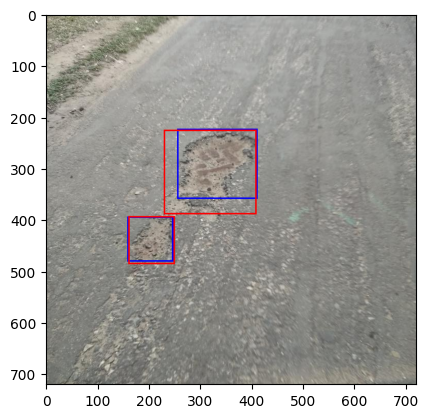


image 1/1 /content/datasets/pothole_dataset_v8/test/images/img-42_jpg.rf.532fb8eb05b1efc570c5e4165e614201.jpg: 736x736 4 potholes, 12.5ms
Speed: 9.7ms preprocess, 12.5ms inference, 3.0ms postprocess per image at shape (1, 3, 736, 736)


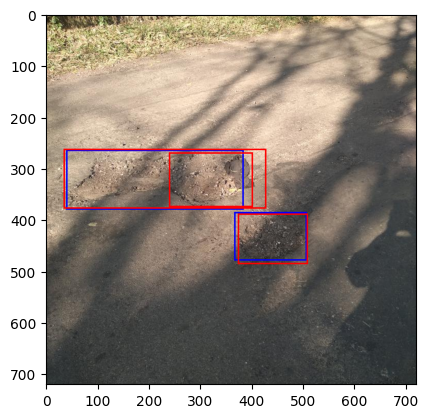


image 1/1 /content/datasets/pothole_dataset_v8/test/images/img-269_jpg.rf.f51d9eb8d02a34ac01d4a486cbfbdd4f.jpg: 736x736 4 potholes, 10.0ms
Speed: 4.8ms preprocess, 10.0ms inference, 2.3ms postprocess per image at shape (1, 3, 736, 736)


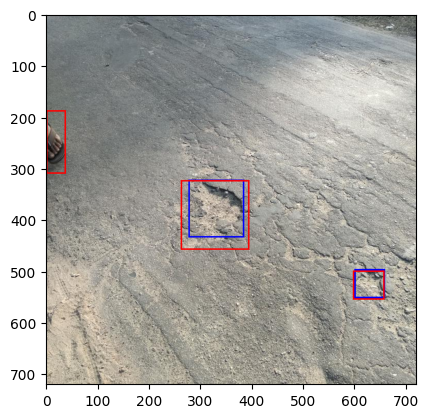


image 1/1 /content/datasets/pothole_dataset_v8/test/images/img-245_jpg.rf.1c9b49a366bda1cf64dbfac2a946cd38.jpg: 736x736 2 potholes, 10.3ms
Speed: 4.6ms preprocess, 10.3ms inference, 2.3ms postprocess per image at shape (1, 3, 736, 736)


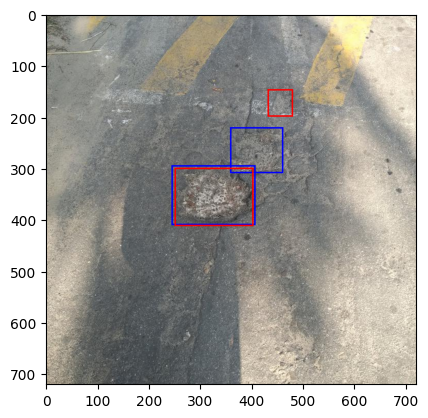


image 1/1 /content/datasets/pothole_dataset_v8/test/images/img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg: 736x736 1 pothole, 10.4ms
Speed: 4.6ms preprocess, 10.4ms inference, 2.2ms postprocess per image at shape (1, 3, 736, 736)


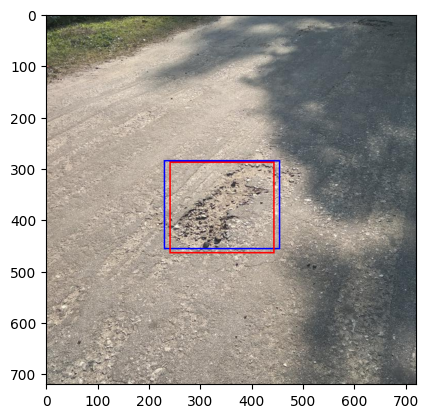


image 1/1 /content/datasets/pothole_dataset_v8/test/images/img-276_jpg.rf.acc167b63d79ab3b99fd64b4109f86d4.jpg: 736x736 1 pothole, 10.4ms
Speed: 6.4ms preprocess, 10.4ms inference, 2.4ms postprocess per image at shape (1, 3, 736, 736)


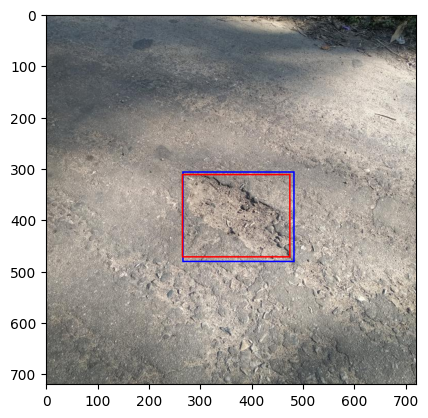


image 1/1 /content/datasets/pothole_dataset_v8/test/images/img-196_jpg.rf.c1e105382a0bb8d329959cea45173cdf.jpg: 736x736 3 potholes, 11.1ms
Speed: 5.2ms preprocess, 11.1ms inference, 3.2ms postprocess per image at shape (1, 3, 736, 736)


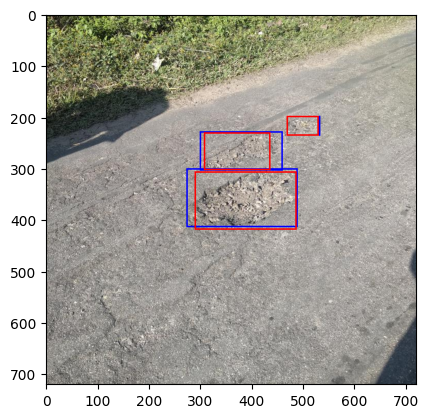


image 1/1 /content/datasets/pothole_dataset_v8/test/images/img-168_jpg.rf.af3590e07b06b43e91fa53990ff94af3.jpg: 736x736 1 pothole, 10.2ms
Speed: 4.8ms preprocess, 10.2ms inference, 2.7ms postprocess per image at shape (1, 3, 736, 736)


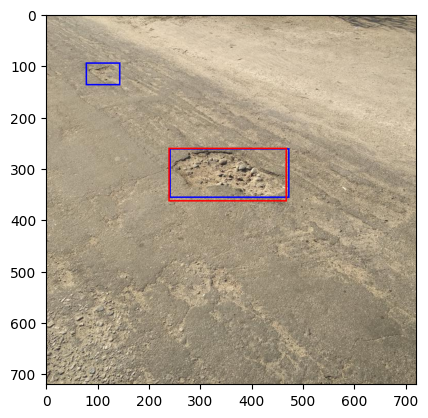


image 1/1 /content/datasets/pothole_dataset_v8/test/images/img-43_jpg.rf.a63cf022f8ba7dbadc62c5d274547b79.jpg: 736x736 6 potholes, 12.0ms
Speed: 4.5ms preprocess, 12.0ms inference, 3.0ms postprocess per image at shape (1, 3, 736, 736)


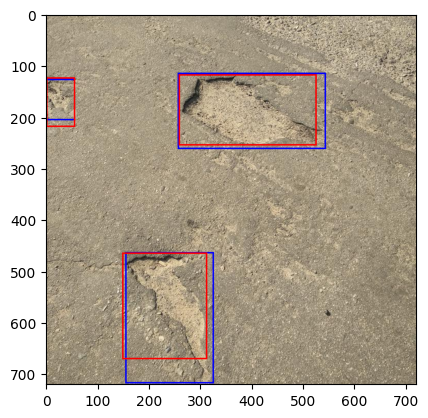


image 1/1 /content/datasets/pothole_dataset_v8/test/images/img-179_jpg.rf.8632eb0d9b75fefe144829e67b75015a.jpg: 736x736 3 potholes, 11.0ms
Speed: 4.9ms preprocess, 11.0ms inference, 2.7ms postprocess per image at shape (1, 3, 736, 736)


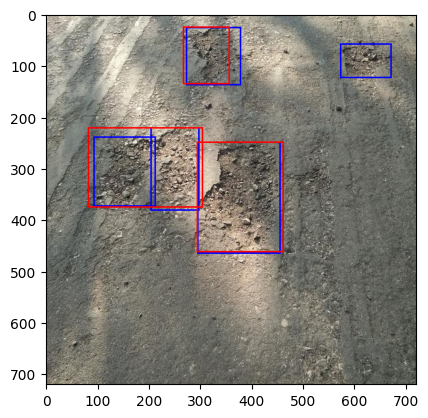

Overall Precision: 0.39
Overall Recall: 0.39
Overall Average IoU: 0.37


In [ ]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import os
import numpy as np

# Replace these paths with the actual paths
folder_path = "/content/datasets/pothole_dataset_v8/test/images"
label_folder_path = "/content/datasets/pothole_dataset_v8/test/labels"

# Initialize variables for evaluation metrics
total_true_positives = 0
total_false_positives = 0
total_false_negatives = 0
total_iou_scores = []

# Specify the number of files to process
num_files_to_process = 10

# Set the IoU threshold for combining bounding boxes
iou_threshold_combine = 0.5

# Iterate over the files in the folder
for filename in os.listdir(folder_path)[:num_files_to_process]:
    # Load the image
    image_path = os.path.join(folder_path, filename)
    img = Image.open(image_path)

    # Get image size
    img_width, img_height = img.size

    # Extract bounding boxes from the results (replace this with your actual prediction logic)
    results = model(image_path)
    boxes = results[0].boxes.xywh.cpu().numpy()

    # Read labels from the corresponding text file
    label_filename = os.path.splitext(filename)[0] + ".txt"
    label_path = os.path.join(label_folder_path, label_filename)

    if os.path.exists(label_path):
        with open(label_path, 'r') as label_file:
            labels = label_file.readlines()

        # Initialize variables for evaluation metrics for the current image
        true_positives = 0
        false_positives = 0
        false_negatives = 0
        iou_scores = []

        # Visualize the bounding boxes and calculate metrics
        draw = ImageDraw.Draw(img)

        # Draw ground truth bounding boxes
        for label in labels:
            label = label.strip().split()
            class_id, x_norm, y_norm, width_norm, height_norm = map(float, label)

            # Convert normalized coordinates to pixel values
            x = int(x_norm * img_width)
            y = int(y_norm * img_height)
            width_gt = int(width_norm * img_width)
            height_gt = int(height_norm * img_height)

            x3 = int(x - width_gt / 2)
            y3 = int(y - height_gt / 2)
            x4 = int(x + width_gt / 2)
            y4 = int(y + height_gt / 2)

            draw.rectangle([x3, y3, x4, y4], outline="blue", width=3)

        # Combine and draw predicted bounding boxes
        combined_boxes = []

        for box in boxes:
            x_center, y_center, width, height = box
            x1 = int(x_center - width / 2)
            y1 = int(y_center - height / 2)
            x2 = int(x_center + width / 2)
            y2 = int(y_center + height / 2)

            # Check for IoU with existing combined boxes
            iou_threshold = iou_threshold_combine
            box_area = width * height

            combined = False

            for combined_box in combined_boxes:
                x3, y3, x4, y4 = combined_box

                # Calculate IoU
                intersection_area = max(0, min(x2, x4) - max(x1, x3)) * max(0, min(y2, y4) - max(y1, y3))
                union_area = box_area + (width_gt * height_gt) - intersection_area
                iou = intersection_area / union_area

                # If IoU is above the threshold, combine the boxes
                if iou >= iou_threshold:
                    combined_boxes.remove(combined_box)
                    x1 = min(x1, x3)
                    y1 = min(y1, y3)
                    x2 = max(x2, x4)
                    y2 = max(y2, y4)
                    combined_boxes.append([x1, y1, x2, y2])
                    combined = True
                    break

            if not combined:
                combined_boxes.append([x1, y1, x2, y2])

            # draw.rectangle([x1, y1, x2, y2], outline="red", width=3)

        # Check for IoU with ground truth boxes
        iou_threshold = 0.5
        box_area = width * height

        for label in labels:
            label = label.strip().split()
            class_id, x_norm, y_norm, width_norm, height_norm = map(float, label)

            # Convert normalized coordinates to pixel values
            x = int(x_norm * img_width)
            y = int(y_norm * img_height)
            width_gt = int(width_norm * img_width)
            height_gt = int(height_norm * img_height)

            x3 = int(x - width_gt / 2)
            y3 = int(y - height_gt / 2)
            x4 = int(x + width_gt / 2)
            y4 = int(y + height_gt / 2)

            # Calculate IoU
            intersection_area = max(0, min(x2, x4) - max(x1, x3)) * max(0, min(y2, y4) - max(y1, y3))
            union_area = box_area + (width_gt * height_gt) - intersection_area
            iou = intersection_area / union_area
            iou_scores.append(iou)

            # Update metrics based on IoU threshold
            if iou >= iou_threshold:
                true_positives += 1
            else:
                false_positives += 1

        # Calculate false negatives
        false_negatives = len(labels) - true_positives

        # Update total metrics
        total_true_positives += true_positives
        total_false_positives += false_positives
        total_false_negatives += false_negatives
        total_iou_scores.extend(iou_scores)

        # Draw the combined bounding box around all predicted boxes
        for combined_box in combined_boxes:
            x1, y1, x2, y2 = combined_box
            draw.rectangle([x1, y1, x2, y2], outline="red", width=3)

        # Display the image with matplotlib (comment this out if you don't want to visualize each image)
        plt.imshow(img)
        plt.show()

# Calculate overall precision, recall, and average IoU
overall_precision = total_true_positives / (total_true_positives + total_false_positives)
overall_recall = total_true_positives / (total_true_positives + total_false_negatives)
overall_average_iou = np.mean(total_iou_scores)

# Print the overall evaluation metrics
print(f"Overall Precision: {overall_precision:.2f}")
print(f"Overall Recall: {overall_recall:.2f}")
print(f"Overall Average IoU: {overall_average_iou:.2f}")


----